# Using GraphvizAnim to show how heapsort works

Import the required packages and instantiate the animation

In [1]:
from gvanim import Animation
from gvanim.jupyter import interactive
ga = Animation()

Define an heap

In [2]:
heap = [ None, 5, 6, 7, 8, 9, 10, 11, 12 ]

Now draw it (nodes will be named as the array indices and labelled as the array values)

In [3]:
ga.label_node( 1, heap[ 1 ] )
for i in range( 2, len( heap ) ):
    ga.label_node( i, heap[ i ] )
    ga.add_edge( i / 2, i )

Define the usual iterative down heap procedure (endowed with animation actions)

In [4]:
def down_heap( i, n ):
    t = heap[ i ]
    while i <= n/2:
        ga.highlight_node( i )
        ga.next_step()
        j = 2 * i
        if j < n and heap[ j ] < heap[ j + 1 ]: j += 1
        ga.highlight_edge( i, j )    
        ga.next_step()
        if t >= heap[ j ]: break
        heap[ i ] = heap[ j ]
        ga.highlight_node( i )
        ga.highlight_node( j )
        ga.label_node( i, heap[ i ] )
        ga.label_node( j, heap[ j ] )             
        ga.next_step()
        i = j
    heap[ i ] = t
    ga.highlight_node( i )
    ga.label_node( i, heap[ i ] )
    ga.next_step()

Fix the heap calling `down_heap` on his lower half

In [5]:
n = len( heap ) - 1
ga.next_step()
for i in range( n / 2, 0, -1 ):
    down_heap( i, n )

And finally exchange the top with heap positions starting form the last one (fixing again with `down_heap`)

In [6]:
ga.next_step()
while n > 1:
    heap[ 1 ], heap[ n ] = heap[ n ], heap[ 1 ]
    ga.highlight_node( 1 )
    ga.highlight_node( n )
    ga.label_node( 1, heap[ 1 ] )
    ga.label_node( n, heap[ n ] )             
    ga.next_step()
    n -= 1
    down_heap( 1, n )

We are ready to plot the animation interactively! 

Be patient: to generate the required 67 graphs will take quite a bit of time; moreover, in case Jupyter does not correctly resize the cell just zoom in and out the document size (with the browser).

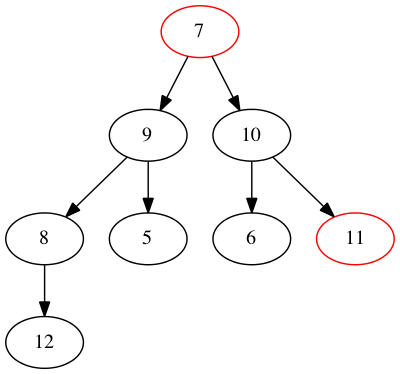

In [7]:
interactive( ga, 400 )    